# Introduction to Machine Learning

## Kenapa butuh AI

AI dibutuhkan oleh manusia beberapa tahun belakangan karena: <br>
1. Menggantikan pekerjaan manusia yang berbahaya, repetitif. <br>
Misalnya investigasi korban bencana di daerah rawan bencana, maka bisa mengirimkan robot AI 
2. Mengotomatiskan pekerjaan, misalnya sorting kacang kualitas jelek di perusahaan

## Machine Learning

Machine learning memerlukan data, kalau pemrograman tradisional itu input, proses, output. AI lebih meniru pekerjakan manusia, seperti penglihatan (computer vision), pengenalan teks (natural language processing). ML memerlukan learning algorithm supaya bisa belajar sesuatu dari data (mengekstrak suatu informasi dari data)

## Terminologi

1. Dataset <br>
Sekumpulan data yang mengandung fitur-fitur yang penting untuk menyelesaikan masalah
2. Fitur <br>
Atribut atau objektif yang dimiliki oleh data agar dapat memahami data sebelu masuk ke model machine learning
3. Model <br>
Representasi dari sebuah algoritma machine learning hasil pembelajaran. Model adalah keluaran yang dihasilkan dalam fase pelatihan sebuah algoritma machine learning.

## Process

Flowchart Machine Learning Process: <br>
1. Data collection
2. Data preparation
3. Training 
4. Evaluation
5. Tuning Hyperparameter

# Regression Models

## Definition
***
Menemukan fungsi yang memetakan beberapa fitur atau variabel ke fitur lain dengan cukup baik. <br>
1. **Fitur dependen** disebut sebagai variabel dependen atau output, atau target
2. **Fitur independen** disebut sebagai variabel atau fitur dari dataset

## Kapan kita butuh regresi?
***
Regresi digunakan untuk menjawab apakah dan bagaimana beberapa fenomena mempengaruhi yang lain. Dengan kata lain, bagaimana keterkaitan antara variabel. <br>
Selain itu, regresi juga digunakan untuk meramalkan respons menggunakan kumpulan prediktor lama

## Linear Regression
***
w1.x1 + w2.x2 + ... + w3.x3 = y <br>
Semisal: <br>
1. **y** adalah harga rumah dalam dolar (USD)
2. **x1, x2, x3** adalah variabel atau fitur yang menjadi prediktor <br>
Semisal didapatkan fungsi persamaan garis akhir: <br>
1500x1 + 2500x2 + 500x3 <br>
**Interpretasi** : Apabila terjadi kenaikan 1 unit pada x1, akan menyumbang sebesar 1500 US Dollar, apabila terjadi kenaikan 1 unit pada x2 akan menyumbang sebesar 2500 US Dollar, dan apabila terjadi kenaikan 1 unit pada x2 akan menyumbang sebesar 500 US Dollar

**PENTING!!** <br>
1. Seluruh fitur diasumsikan independen <br>
Misal ada dua fitur yang highly correlated, maka kita bisa removed salah satu fiturnya. Hal ini disebut multikolinearity. Adanya dependensi antara dua fitur. Bisa di cek dengan VIF <br>
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
2. Harus Homoscedasticity <br>
Ketika tidak terjadi homoscedasicity, maka model dibuat lebih kompleks lagi. Untuk mengetahui Homoscesdasticity terjadi, kita bisa plotting scatter antara fitur X dengan residualnya

## Implementasi Linear Regression

### Import Libraries

In [2]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)


In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Provide Data

In [5]:
X = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])

### Create model and fit it

In [8]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

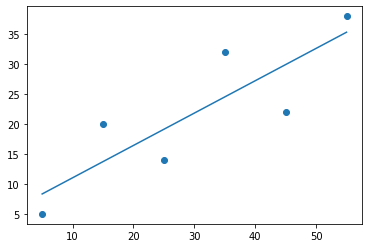

In [10]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [11]:
r_square = model.score(X,y)
r_square

0.7158756137479542

In [12]:
print('Gradient = ',model.coef_)
print('Intercept = ', model.intercept_)

Gradient =  [0.54]
Intercept =  5.633333333333329


In [15]:
y_pred2 = model.coef_ * X + model.intercept_

In [17]:
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [18]:
y_pred2

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

Interpretasi: <br>
Setiap kenaikan 1 unit pada fitur 1 maka berkontribusi kenaikan pada y sebesar 0,54 (gradient masing-masing fitur)

## Implementasi Multiple Linear Regression
***
Ada lebih dari 1 fitur

In [38]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [43]:
model_multiple_linear_regression = LinearRegression().fit(x,y)
y_pred_multiple = model_multiple_linear_regression.predict(x)

In [40]:
print('Gradient = ',model_multiple_linear_regression.coef_)
print('Intercept = ', model_multiple_linear_regression.intercept_)

Gradient =  [0.44706965 0.25502548]
Intercept =  5.52257927519819


In [41]:
print('Coefficient of determination = ', model_multiple_linear_regression.score(x,y))

Coefficient of determination =  0.8615939258756775


**Interpretasi** <br>
Setiap kenaikan 1 unit di fitur x1 menyumbang kenaikan sebesar 0,44 pada y, setiap kenaikan 1 unit di fitur x2 menyumbang kenaikan sebesar 0,255 pada y

## Implementasi Polynomial Regression

### Import Libraries

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Provide Data

In [47]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

#### Transform input data untuk mengincludekan x^2

In [48]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


### Create Linear Regression model

In [49]:
model = LinearRegression().fit(x_, y)

### Get Results

In [50]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498563
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


## Implementing Linear Regresiion on Real Dataset

### Import data from libraries (Boston Dataset)

In [56]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn

data = datasets.load_boston() ## loads Boston dataset from datasets library 

C:\Users\ASUS\.conda\envs\H8_001\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [57]:
import numpy as np
import pandas as pd

In [58]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [59]:
# define predictor and target
X = df["RM"]
y = target["MEDV"]

### Implementing Linear Regression using Statsmodel

In [60]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [61]:
predictions

0      24.020779
1      23.458163
2      26.249323
3      25.566146
4      26.110495
         ...    
501    24.086539
502    22.358504
503    25.485772
504    24.820863
505    22.029703
Length: 506, dtype: float64

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                   3.74e-256
Time:                        22:34:02   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

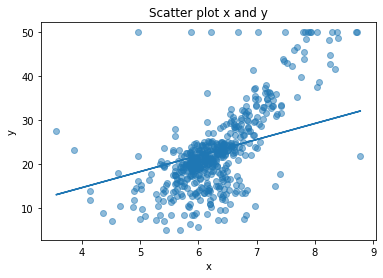

In [63]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Implementing Linear Regression Using Sklearn

In [65]:
from sklearn import linear_model
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library

C:\Users\ASUS\.conda\envs\H8_001\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

### Provide data and split predictor and target

In [66]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=['MEDV'])

In [67]:
X = df
y = target['MEDV']

In [68]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [69]:
predictions = lm.predict(X)

In [70]:
lm.score(X,y)

0.7406426641094094